In [1]:
%cd /home/jeroen/repos/traffic-scheduling/
from motion.direct_transcription import generate_edge_trajectories
from network.exact import solve
from network.generate import generate_grid_network, generate_simple_instance
from network.util import vehicle_indices, route_indices

/home/jeroen/repos/traffic-scheduling


In [5]:
G, routes = generate_grid_network(3, 2)
instance = generate_simple_instance(G, routes)

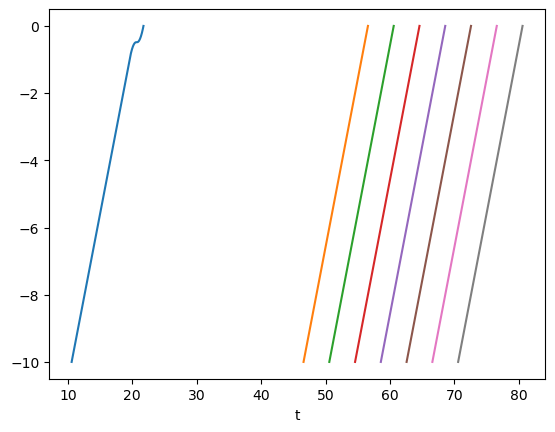

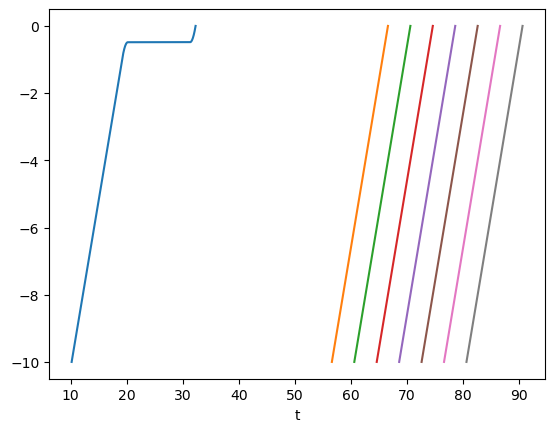

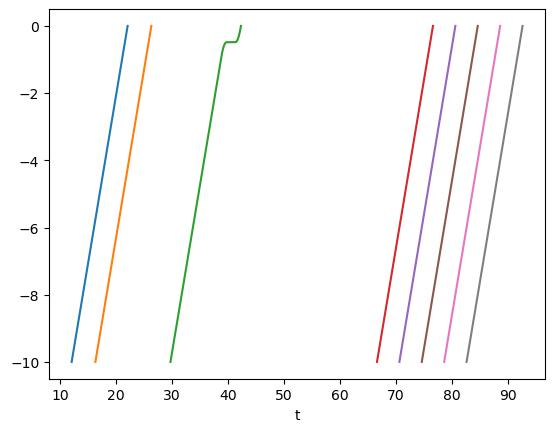

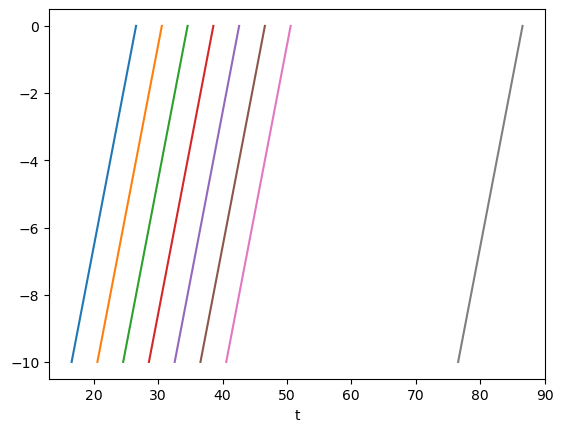

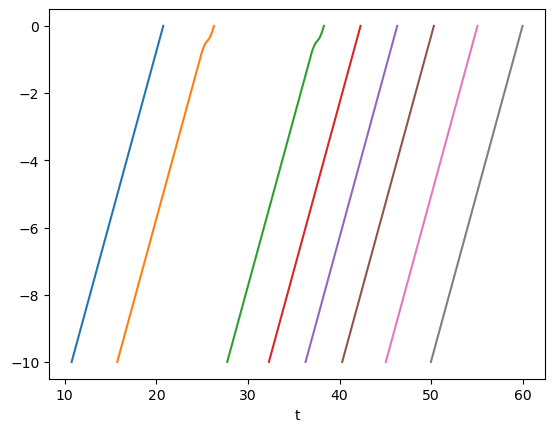

In [6]:
from IPython.utils import io
import matplotlib.pyplot as plt

y, res = solve(instance, timelimit=2, consolelog=False)

for r in route_indices(vehicle_indices(instance)):
    v = instance['route'][r][1]
    
    # suppress solver output
    with io.capture_output() as captured:
        trajectories = generate_edge_trajectories(instance, y, 0.01, r, v)
    
    fig, ax = plt.subplots()
    for trajectory in trajectories.values():
        trajectory.plot(x='t', y='x', legend=False, ax=ax)